# Speed Dating

Content
 1. [Problem](#section1)
   <a href="#section1"></a>
 2. [Solution](#section10)
   <a href="#section10"></a>  
 3. [Obtaining Data ](#section2)
   <a href="#section2"></a>
 4. [Data Cleaning and Preparation ](#section3)
   <a href="#section3"></a>  
   * [Speed Dating Event data Key](#section31)
     <a href="#section31"></a>
   * [Scorecard Data key ](#section32)
     <a href="#section32"></a>  
     - [Subject's Scorecard](#section321)
       <a href="#section321"></a> 
     - [Partner's Scorecard](#section322)
       <a href="#section322"></a>  
 5. [Feature Engineering](#section4)
   <a href="#section4"></a>     
   * [Subject's Overall Rating of Partner](#section41)
     <a href="#section41"></a> 
   * [Partner's Overall Rating of Subject](#section42)
     <a href="#section42"></a>   
   * [Actually Met before](#section43)
     <a href="#section43"></a>   
 6. [Exploratory Data Analysis (EDA)](#section5)
   <a href="#section5"></a>     
   * [Relation between Interest Correlation and Match](#section51)
     <a href="#section51"></a>
   * [Relation between Choice and Match](#section52)
     <a href="#section52"></a>
   * [Relation between Subject's Scorecard Ratings and Match](#section53)
     <a href="#section53"></a>  
   * [Relation between Partner's scorecard ratings and Match ](#section54)
     <a href="#section54"></a>
   * [Relation between Met and Match ](#section55)
     <a href="#section55"></a>
 7. [Correlation](#section6)
   <a href="#section6"></a>   
   * [Correlation Tables ](#section61)
     <a href="#section61"></a>
   * [Heatmaps ](#section62)
     <a href="#section62"></a>  
 8. [Model Development](#section7)
   <a href="#section7"></a>
   * [Feature Selection ](#section71)
     <a href="#section71"></a>
   * [Train,test split](#section72)
     <a href="#section72"></a> 
   * [RandomForest Algorithm ](#section73)
     <a href="#section73"></a>
 9. [Model Evaluation](#section8)
   <a href="#section8"></a>
   * [Confusion Matrix](#section81)
     <a href="#section81"></a> 
   * [Classification Report ](#section82)
     <a href="#section82"></a>
   * [ROC-curve ](#section83)
     <a href="#section83"></a>    
 10. [Result](#section9)
   <a href="#section9"></a> 

<a id="section1"></a>

## 1. Problem

A dating company called "Lemon Law" is planning to come up with an app which aims at improving the quality of your matches  by bringing the speed dating experience online as both are made to fill a scorecard to rate their partner at the end of their five minute text conversation.

<a id="section10"></a>
## 2. Solution

* To solve this problem, a predictive model is to be made by using the Speed Dating Experiment dataset. It's available in   Kaggle.
* After coming up with one, it will be tested on day four of the speed dating event.

<a id="section2"></a>
## 3. Obtaining Data 

In [1]:
import pandas as pd
df=pd.read_csv("Speed Dating Data.csv", engine="python")
df.shape

(8378, 195)

In [2]:
import warnings
warnings.filterwarnings('ignore')

### As dataset is too big for my laptop to handle, dataset will be reduced to the first four waves only

In [3]:
speedDF=df[(df["wave"]==1)| (df["wave"]==2) | (df["wave"]==3) | (df["wave"]==4)]
speedDF.shape

(1656, 195)

<a id="section3"></a>
## 4. Data Cleaning and  Preparation

<a id="section31"></a>
###  &nbsp; 4.1. Speed Dating Event data Key

1. iid: 	unique subject number, group(wave id gender)

2. id:  	subject number within wave

3. gender:	Female=0,Male=1

4. idg: 	subject number within gender, group(id gender)

5. condtn: 1=limited choice , 2=extensive choice

6. wave: The day on which the speed dating event takes place.

7. round:		number of people that met in wave

8. order: 		the number of date that night when met partner

9. partner: 	partner’s id number the night of event

10. pid: 		partner’s iid number

11. match		1=yes, 0=no

12. int_corr:	correlation between participant’s and partner’s ratings of interests in Time 1

13. samerace:  	participant and the partner were the same race. 1= yes, 0=no

14. age_o:		age of partner

15. race_o:		race of partner




In [4]:
all=["object","int64","float"]

In [5]:
col1=["iid","id","gender","idg","condtn","wave","round","order","partner","pid","match","int_corr","samerace","age_o","race_o"]

In [6]:
speedDF[col1].shape

(1656, 15)

In [7]:
speedDF[col1][speedDF["iid"]==11].head(11)

,iid,id,gender,idg,condtn,wave,round,order,partner,pid,match,int_corr,samerace,age_o,race_o
100,11,1.0,1,2,1,1,10,4,1,1.0,0,0.14,0,21.0,4.0
101,11,1.0,1,2,1,1,10,10,2,2.0,0,0.29,1,24.0,2.0
102,11,1.0,1,2,1,1,10,6,3,3.0,0,-0.24,1,25.0,2.0
103,11,1.0,1,2,1,1,10,3,4,4.0,0,-0.18,1,23.0,2.0
104,11,1.0,1,2,1,1,10,1,5,5.0,0,-0.43,1,21.0,2.0
105,11,1.0,1,2,1,1,10,5,6,6.0,0,0.33,0,23.0,4.0
106,11,1.0,1,2,1,1,10,2,7,7.0,0,0.19,0,22.0,4.0
107,11,1.0,1,2,1,1,10,7,8,8.0,0,-0.03,1,25.0,2.0
108,11,1.0,1,2,1,1,10,8,9,9.0,0,0.19,0,26.0,6.0
109,11,1.0,1,2,1,1,10,9,10,10.0,0,0.30,1,26.0,2.0


In [8]:
speedDF[col1].describe(include=all)

,iid,id,gender,idg,condtn,wave,round,order,partner,pid,match,int_corr,samerace,age_o,race_o
count,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1584.000000,1656.000000,1636.000000,1636.000000
mean,59.992754,8.461353,0.500000,16.355072,1.758454,2.782609,15.884058,8.442029,8.461353,59.992754,0.169082,0.156035,0.391304,25.636308,2.685819
std,31.510109,5.033034,0.500151,9.913804,0.428150,1.093164,3.450622,4.992347,5.033034,31.510109,0.374938,0.321716,0.488190,3.370007,1.223748
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,0.000000,-0.630000,0.000000,21.000000,1.000000
25%,34.000000,4.000000,0.000000,8.000000,2.000000,2.000000,16.000000,4.000000,4.000000,34.000000,0.000000,-0.070000,0.000000,23.000000,2.000000
50%,57.500000,8.000000,0.500000,15.000000,2.000000,3.000000,18.000000,8.000000,8.000000,57.500000,0.000000,0.155000,0.000000,25.000000,2.000000
75%,88.250000,12.000000,1.000000,24.000000,2.000000,4.000000,18.000000,12.000000,12.000000,88.250000,0.000000,0.410000,1.000000,28.000000,4.000000
max,111.000000,20.000000,1.000000,36.000000,2.000000,4.000000,19.000000,19.000000,20.000000,111.000000,1.000000,0.900000,1.000000,39.000000,6.000000


### Correlation between subject and partner's interests  column (int_corr)

In [9]:
speedDF["int_corr"][speedDF["int_corr"].isnull()]="NaN"
median=speedDF["int_corr"].median()
speedDF["int_corr"][speedDF["int_corr"]=="NaN"]=median

### Partner's age column (age_o)

In [10]:
speedDF["age_o"][speedDF["age_o"].isnull()]="NaN"
speedDF["age_o"][speedDF["age_o"]=="NaN"]=median
median=speedDF["age_o"].median()
median

25.0

In [11]:
speedDF["age_o"][speedDF["age_o"]=="NaN"]=median

### Partner's race column (race_o)

In [12]:
speedDF["race_o"][speedDF["race_o"].isnull()]="NaN"

In [13]:
speedDF["samerace"][(speedDF["race_o"]=="NaN")].value_counts()

0    20
Name: samerace, dtype: int64

None of these instances involve subject and partner of the same race.

### checking if 'race' column is up to date

In [14]:
speedDF["race"].describe()

count    1636.000000
mean        2.685819
std         1.223748
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max         6.000000
Name: race, dtype: float64

It's incomplete and has equal number of empty instances when compared to 'race_o' column. 

In [15]:
speedDF["race_o"].value_counts()

2.0    956
4.0    326
3.0    152
6.0    104
1.0     98
NaN     20
Name: race_o, dtype: int64

as majority of them have the value two, the missing instances too will be assigned the same value. 

In [16]:
speedDF["race_o"][(speedDF["race_o"]=="NaN")]=2.0

In [17]:
speedDF[col1].describe(include=all)

,iid,id,gender,idg,condtn,wave,round,order,partner,pid,match,int_corr,samerace,age_o,race_o
count,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000,1656.000000,1656.0,1656.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137.000,NaN,15.0,5.0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.155,NaN,23.0,2.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.000,NaN,227.0,976.0
mean,59.992754,8.461353,0.500000,16.355072,1.758454,2.782609,15.884058,8.442029,8.461353,59.992754,0.169082,NaN,0.391304,NaN,NaN
std,31.510109,5.033034,0.500151,9.913804,0.428150,1.093164,3.450622,4.992347,5.033034,31.510109,0.374938,NaN,0.488190,NaN,NaN
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,0.000000,NaN,0.000000,NaN,NaN
25%,34.000000,4.000000,0.000000,8.000000,2.000000,2.000000,16.000000,4.000000,4.000000,34.000000,0.000000,NaN,0.000000,NaN,NaN
50%,57.500000,8.000000,0.500000,15.000000,2.000000,3.000000,18.000000,8.000000,8.000000,57.500000,0.000000,NaN,0.000000,NaN,NaN
75%,88.250000,12.000000,1.000000,24.000000,2.000000,4.000000,18.000000,12.000000,12.000000,88.250000,0.000000,NaN,1.000000,NaN,NaN


In [18]:
speedDF["int_corr"]=speedDF["int_corr"].astype(float)
speedDF["age_o"]=speedDF["age_o"].astype(int)
speedDF["race_o"]=speedDF["race_o"].astype(int)

In [19]:
speedDF[col1].dtypes

iid           int64
id          float64
gender        int64
idg           int64
condtn        int64
wave          int64
round         int64
order         int64
partner       int64
pid         float64
match         int64
int_corr    float64
samerace      int64
age_o         int32
race_o        int32
dtype: object

<a id="section32"></a>
### 4.2. Scorecard Data key

1. Decision:dec 1=yes,0=no
	
2. Attributes
   (1=awful, 10=great)	
   * Attractive: attr
   * Sincere: sinc
   * Intelligent: intel
   * Fun: fun
   * Ambitious: amb
   * Shared Interests/Hobbies: shar
	
3. Overall, how much do you like this person?
   (1=don't like at all, 10=like a lot)-->like
 
4. How probable do you think it is that this person will say 'yes' for you?
   (1=not probable, 10=extremely probable)-->prob
 
5. Have you met this person before?
   (1=yes,2=no)-->met


<a id="section321"></a>
### &nbsp; 4.2.1 Subject's Scorecard

In [20]:
col7=["dec","attr","sinc","intel","fun","amb","shar","like","prob","met"]

In [21]:
speedDF[col7].describe(include=all)

,dec,attr,sinc,intel,fun,amb,shar,like,prob,met
count,1656.000000,1635.000000,1618.000000,1619.000000,1595.000000,1531.000000,1447.000000,1633.000000,1612.000000,1615.000000
mean,0.412440,6.113761,7.189122,7.388820,6.365517,6.798824,5.467519,6.168096,4.867556,1.955418
std,0.492422,1.988852,1.721060,1.531496,2.006249,1.791691,2.114541,1.917110,2.180905,0.226484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,5.000000,6.000000,7.000000,5.000000,6.000000,4.000000,5.000000,3.000000,2.000000
50%,0.000000,6.000000,7.000000,7.000000,7.000000,7.000000,5.000000,6.000000,5.000000,2.000000
75%,1.000000,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,7.000000,6.000000,2.000000
max,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000


In [22]:
speedDF["met"].value_counts()

2.0    1537
1.0      76
5.0       1
3.0       1
Name: met, dtype: int64

In [23]:
for i in range(0,len(speedDF)):
    if speedDF.loc[i,"met"]>2:
        speedDF.loc[i,"met"]=2
    else:
        continue;

In [24]:
speedDF["met"].value_counts()

2.0    1539
1.0      76
Name: met, dtype: int64

In [25]:
speedDF["attr"][speedDF["attr"].isnull()]="NaN"
speedDF["sinc"][speedDF["sinc"].isnull()]="NaN"
speedDF["intel"][speedDF["intel"].isnull()]="NaN"
speedDF["fun"][speedDF["fun"].isnull()]="NaN"
speedDF["amb"][speedDF["amb"].isnull()]="NaN"
speedDF["shar"][speedDF["shar"].isnull()]="NaN"
speedDF["like"][speedDF["like"].isnull()]="NaN"
speedDF["prob"][speedDF["prob"].isnull()]="NaN"
speedDF["met"][speedDF["met"].isnull()]="NaN"

In [26]:
for i in range(0,len(speedDF)):
    if speedDF.loc[i,"attr"]=="NaN":
        a1=speedDF["attr"][speedDF["pid"]==speedDF.loc[i,"pid"]].median()
        speedDF.loc[i,"attr"]=a1
    else:
        continue;

In [27]:
for i in range(0,len(speedDF)):
    if speedDF.loc[i,"sinc"]=="NaN":
        a1=speedDF["sinc"][speedDF["pid"]==speedDF.loc[i,"pid"]].median()
        speedDF.loc[i,"sinc"]=a1
    else:
        continue;

In [28]:
for i in range(0,len(speedDF)):
    if speedDF.loc[i,"intel"]=="NaN":
        a1=speedDF["intel"][speedDF["pid"]==speedDF.loc[i,"pid"]].median()
        speedDF.loc[i,"intel"]=a1
    else:
        continue;

In [29]:
for i in range(0,len(speedDF)):
    if speedDF.loc[i,"fun"]=="NaN":
        a1=speedDF["fun"][speedDF["pid"]==speedDF.loc[i,"pid"]].median()
        speedDF.loc[i,"fun"]=a1
    else:
        continue;

In [30]:
for i in range(0,len(speedDF)):
    if speedDF.loc[i,"amb"]=="NaN":
        a1=speedDF["amb"][speedDF["pid"]==speedDF.loc[i,"pid"]].median()
        speedDF.loc[i,"amb"]=a1
    else:
        continue;

In [31]:
for i in range(0,len(speedDF)):
    if speedDF.loc[i,"shar"]=="NaN":
        a1=speedDF["shar"][speedDF["pid"]==speedDF.loc[i,"pid"]].median()
        speedDF.loc[i,"shar"]=a1
    else:
        continue;

In [32]:
for i in range(0,len(speedDF)):
    if speedDF.loc[i,"like"]=="NaN":
        a1=speedDF["like"][speedDF["pid"]==speedDF.loc[i,"pid"]].median()
        speedDF.loc[i,"like"]=a1
    else:
        continue;

In [33]:
for i in range(0,len(speedDF)):
    if speedDF.loc[i,"prob"]=="NaN":
        a1=speedDF["prob"][speedDF["pid"]==speedDF.loc[i,"pid"]].median()
        speedDF.loc[i,"prob"]=a1
    else:
        continue;

In [34]:
for i in range(0,len(speedDF)):
    if speedDF.loc[i,"met"]=="NaN":
        a1=speedDF["met"][speedDF["pid"]==speedDF.loc[i,"pid"]].median()
        speedDF.loc[i,"met"]=a1
    else:
        continue;

In [35]:
speedDF[col7].dtypes

dec       int64
attr     object
sinc     object
intel    object
fun      object
amb      object
shar     object
like     object
prob     object
met       int64
dtype: object

In [36]:
speedDF["attr"]=speedDF["attr"].astype(float)
speedDF["sinc"]=speedDF["sinc"].astype(float)
speedDF["intel"]=speedDF["intel"].astype(float)
speedDF["fun"]=speedDF["fun"].astype(float)
speedDF["amb"]=speedDF["amb"].astype(float)
speedDF["shar"]=speedDF["shar"].astype(float)
speedDF["like"]=speedDF["like"].astype(float)
speedDF["prob"]=speedDF["prob"].astype(float)

In [37]:
speedDF[col7].describe(include=all)

,dec,attr,sinc,intel,fun,amb,shar,like,prob,met
count,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000
mean,0.412440,6.107186,7.192029,7.387228,6.357488,6.800423,5.452899,6.160930,4.862017,1.954106
std,0.492422,1.980223,1.703104,1.517372,1.985730,1.743142,2.005555,1.909012,2.161140,0.209318
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,5.000000,6.000000,7.000000,5.000000,6.000000,4.000000,5.000000,3.000000,2.000000
50%,0.000000,6.000000,7.000000,7.000000,7.000000,7.000000,5.000000,6.000000,5.000000,2.000000
75%,1.000000,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,7.000000,6.000000,2.000000
max,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000


<a id="section322"></a>
### &nbsp; 4.2.2 Partner's Scorecard

In [38]:
col8=["dec_o","attr_o","sinc_o","intel_o","fun_o","amb_o","shar_o","like_o","prob_o","met_o"]

In [39]:
speedDF[col8].describe(include=all)

,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o
count,1656.000000,1635.000000,1618.000000,1619.000000,1595.000000,1531.000000,1447.000000,1633.000000,1612.000000,1615.000000
mean,0.412440,6.113761,7.189122,7.388820,6.365517,6.798824,5.467519,6.168096,4.867556,1.955418
std,0.492422,1.988852,1.721060,1.531496,2.006249,1.791691,2.114541,1.917110,2.180905,0.226484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,5.000000,6.000000,7.000000,5.000000,6.000000,4.000000,5.000000,3.000000,2.000000
50%,0.000000,6.000000,7.000000,7.000000,7.000000,7.000000,5.000000,6.000000,5.000000,2.000000
75%,1.000000,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,7.000000,6.000000,2.000000
max,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000


In [40]:
speedDF["met_o"].value_counts()

2.0    1537
1.0      76
5.0       1
3.0       1
Name: met_o, dtype: int64

In [41]:
for i in range(0,len(speedDF)):
    if speedDF.loc[i,"met_o"]>2:
        speedDF.loc[i,"met_o"]=2
    else:
        continue;

In [42]:
speedDF["attr_o"][speedDF["attr_o"].isnull()]="NaN"
speedDF["sinc_o"][speedDF["sinc_o"].isnull()]="NaN"
speedDF["intel_o"][speedDF["intel_o"].isnull()]="NaN"
speedDF["fun_o"][speedDF["fun_o"].isnull()]="NaN"
speedDF["amb_o"][speedDF["amb_o"].isnull()]="NaN"
speedDF["shar_o"][speedDF["shar_o"].isnull()]="NaN"
speedDF["like_o"][speedDF["like_o"].isnull()]="NaN"
speedDF["prob_o"][speedDF["prob_o"].isnull()]="NaN"
speedDF["met_o"][speedDF["met_o"].isnull()]="NaN"

In [43]:
for i in range(0,len(speedDF)):
    if speedDF.loc[i,"attr_o"]=="NaN":
        a1=speedDF["attr_o"][speedDF["iid"]==speedDF.loc[i,"iid"]].median()
        speedDF.loc[i,"attr_o"]=a1
    else:
        continue;

In [44]:
for i in range(0,len(speedDF)):
    if speedDF.loc[i,"sinc_o"]=="NaN":
        a1=speedDF["sinc_o"][speedDF["iid"]==speedDF.loc[i,"iid"]].median()
        speedDF.loc[i,"sinc_o"]=a1
    else:
        continue;

In [45]:
for i in range(0,len(speedDF)):
    if speedDF.loc[i,"intel_o"]=="NaN":
        a1=speedDF["intel_o"][speedDF["iid"]==speedDF.loc[i,"iid"]].median()
        speedDF.loc[i,"intel_o"]=a1
    else:
        continue;

In [46]:
for i in range(0,len(speedDF)):
    if speedDF.loc[i,"amb_o"]=="NaN":
        a1=speedDF["amb_o"][speedDF["iid"]==speedDF.loc[i,"iid"]].median()
        speedDF.loc[i,"amb_o"]=a1
    else:
        continue;

In [47]:
for i in range(0,len(speedDF)):
    if speedDF.loc[i,"shar_o"]=="NaN":
        a1=speedDF["shar_o"][speedDF["iid"]==speedDF.loc[i,"iid"]].median()
        speedDF.loc[i,"shar_o"]=a1
    else:
        continue;

In [48]:
for i in range(0,len(speedDF)):
    if speedDF.loc[i,"fun_o"]=="NaN":
        a1=speedDF["fun_o"][speedDF["iid"]==speedDF.loc[i,"iid"]].median()
        speedDF.loc[i,"fun_o"]=a1
    else:
        continue;

In [49]:
for i in range(0,len(speedDF)):
    if speedDF.loc[i,"like_o"]=="NaN":
        a1=speedDF["like_o"][speedDF["iid"]==speedDF.loc[i,"iid"]].median()
        speedDF.loc[i,"like_o"]=a1
    else:
        continue;

In [50]:
for i in range(0,len(speedDF)):
    if speedDF.loc[i,"prob_o"]=="NaN":
        a1=speedDF["prob_o"][speedDF["iid"]==speedDF.loc[i,"iid"]].median()
        speedDF.loc[i,"prob_o"]=a1
    else:
        continue;

In [51]:
for i in range(0,len(speedDF)):
    if speedDF.loc[i,"met_o"]=="NaN":
        a1=speedDF["met_o"][speedDF["iid"]==speedDF.loc[i,"iid"]].median()
        speedDF.loc[i,"met_o"]=a1
    else:
        continue;

In [52]:
speedDF["met"].value_counts()

2    1580
1      76
Name: met, dtype: int64

In [53]:
speedDF[col8].describe(include=all)

,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o
count,1656.000000,1656.0,1656.0,1656.0,1656.0,1656.0,1656.0,1656.0,1656.0,1656.000000
unique,NaN,14.0,13.0,15.0,15.0,16.0,18.0,17.0,14.0,NaN
top,NaN,6.0,7.0,8.0,7.0,7.0,5.0,7.0,5.0,NaN
freq,NaN,343.0,420.0,461.0,353.0,406.0,382.0,383.0,366.0,NaN
mean,0.412440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.954106
std,0.492422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.209318
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
50%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
75%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000


In [54]:
speedDF[col8].dtypes

dec_o       int64
attr_o     object
sinc_o     object
intel_o    object
fun_o      object
amb_o      object
shar_o     object
like_o     object
prob_o     object
met_o       int64
dtype: object

In [55]:
speedDF["attr_o"]=speedDF["attr_o"].astype(float)
speedDF["sinc_o"]=speedDF["sinc_o"].astype(float)
speedDF["intel_o"]=speedDF["intel_o"].astype(float)
speedDF["fun_o"]=speedDF["fun_o"].astype(float)
speedDF["amb_o"]=speedDF["amb_o"].astype(float)
speedDF["shar_o"]=speedDF["shar_o"].astype(float)
speedDF["like_o"]=speedDF["like_o"].astype(float)
speedDF["prob_o"]=speedDF["prob_o"].astype(float)

In [56]:
speedDF[col8].describe(include=all)

,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o
count,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000
mean,0.412440,6.107186,7.192029,7.387228,6.357488,6.800423,5.452899,6.160930,4.862017,1.954106
std,0.492422,1.980223,1.703104,1.517372,1.985730,1.743142,2.005555,1.909012,2.161140,0.209318
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,5.000000,6.000000,7.000000,5.000000,6.000000,4.000000,5.000000,3.000000,2.000000
50%,0.000000,6.000000,7.000000,7.000000,7.000000,7.000000,5.000000,6.000000,5.000000,2.000000
75%,1.000000,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,7.000000,6.000000,2.000000
max,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000


<a id="section4"></a>
## 5. Feature Engineering

<a id="section41"></a>
### &nbsp; 5.1.  Subject's Overall Rating of Partner

In [57]:
speedDF["rating"]=(speedDF["attr"]+speedDF["sinc"]+speedDF["intel"]+speedDF["fun"]+speedDF["amb"]+speedDF["shar"])/6.0

The culmination of all attributes rated out of ten by the subject.

In [58]:
speedDF["rating"].dtypes

dtype('float64')

<a id="section42"></a>
### &nbsp; 5.2.  Partner's Overall Rating of Subject

In [59]:
speedDF["rating_o"]=(speedDF["attr_o"]+speedDF["sinc_o"]+speedDF["intel_o"]+speedDF["fun_o"]+speedDF["amb_o"]+speedDF["shar_o"])/6.0

The culmination of all attributes rated out of ten by the partner.

In [60]:
speedDF["rating_o"].dtypes

dtype('float64')

<a id="section43"></a>
### &nbsp; 5.3.  Actually Met before

In [61]:
speedDF["act_met"]=speedDF["met"]
for i in range(0,len(speedDF)):
    if (speedDF.loc[i,"met"]==speedDF.loc[i,"met_o"]) & (speedDF.loc[i,"met"]==1):
        speedDF.loc[i,"act_met"]=1
    elif  (speedDF.loc[i,"met"]==speedDF.loc[i,"met_o"]) & (speedDF.loc[i,"met"]==2):
        speedDF.loc[i,"act_met"]=0
    elif  (speedDF.loc[i,"met"]!=speedDF.loc[i,"met_o"]):
        speedDF.loc[i,"act_met"]=0

In [62]:
speedDF["act_met"].dtypes

dtype('int64')

<a id="section5"></a>
## 6. Exploratory Data Analysis (EDA)

Checking relation of feature variables with target variable,which is column "match"

In [63]:
data=speedDF

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

<a id="section51"></a>
### &nbsp; 6.1. Relation between Interest Correlation and Match

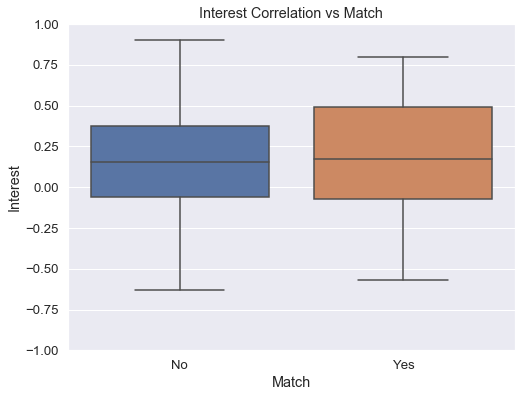

In [65]:
sns.set(font_scale=1.2)
fig,axs=plt.subplots(figsize=(8,6))
c1=sns.boxplot(y="int_corr",x="match",data=data,ax=axs)
c1.set_xticklabels(["No","Yes"])
c1.set(ylabel="Interest")
c1.set(xlabel="Match")
c1.set_title("Interest Correlation vs Match")
c1.set(ylim=(-1,1))
plt.show(c1)

There is no relation between Interest Correlation and Match.

<a id="section52"></a>
### &nbsp; 6.2. Relation between Choice and Match

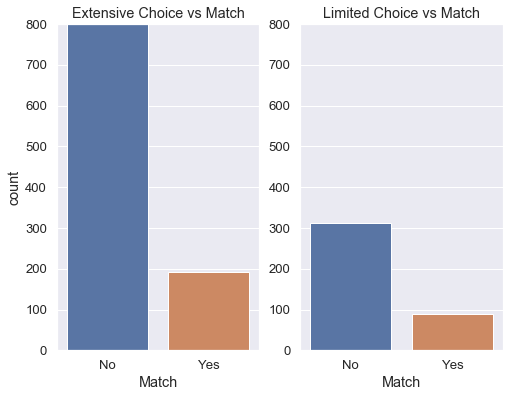

In [66]:
sns.set(font_scale=1.2)
fig,axs=plt.subplots(1,2,figsize=(8,6))
c1=sns.countplot(x="match",data=data[data["condtn"]==2],ax=axs[0])
c1.set_xticklabels(["No","Yes"])
c1.set(ylim=(0,800))
c1.set(xlabel="Match")
c1.set_title("Extensive Choice vs Match")
c2=sns.countplot(x="match",data=data[data["condtn"]==1],ax=axs[1])
c2.set_xticklabels(["No","Yes"])
c2.set(ylim=(0,800))
c2.set(ylabel="")
c2.set(xlabel="Match")
c2.set_title("Limited Choice vs Match")
plt.show(c1)
plt.show(c2)

There is no relation between Choice and Match.

<a id="section53"></a>
### 6.3. Relation between Subject's scorecard ratings and Match

Text(0.5, 1.0, 'Shared Interests vs Match')

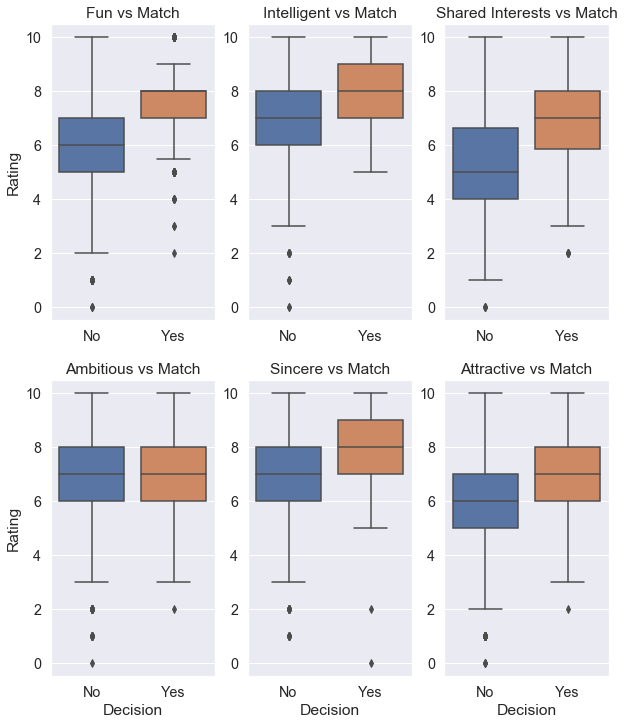

In [67]:
sns.set(font_scale=1.3)
fig,axs=plt.subplots(2,3,figsize=(10,12))
c1=sns.boxplot(y="fun",x="match",data=data,ax=axs[0,0])
c1.set_xticklabels(["No","Yes"])
c1.set(ylabel="Rating")
c1.set(xlabel="")
c1.set_title("Fun vs Match")

c2=sns.boxplot(y="intel",x="match",data=data,ax=axs[0,1])
c2.set_xticklabels(["No","Yes"])
c2.set(ylabel="")
c2.set(xlabel="")
c2.set_title("Intelligent vs Match")

c3=sns.boxplot(y="amb",x="match",data=data,ax=axs[1,0])
c3.set_xticklabels(["No","Yes"])
c3.set(ylabel="Rating")
c3.set(xlabel="Decision")
c3.set_title("Ambitious vs Match")

c4=sns.boxplot(y="sinc",x="match",data=data,ax=axs[1,1])
c4.set_xticklabels(["No","Yes"])
c4.set(ylabel="")
c4.set(xlabel="Decision")
c4.set_title("Sincere vs Match")


c5=sns.boxplot(y="attr",x="match",data=data,ax=axs[1,2])
c5.set_xticklabels(["No","Yes"])
c5.set(ylabel="")
c5.set(xlabel="Decision")
c5.set_title("Attractive vs Match")

c6=sns.boxplot(y="shar",x="match",data=data,ax=axs[0,2])
c6.set_xticklabels(["No","Yes"])
c6.set(ylabel="")
c6.set(xlabel="")
c6.set_title("Shared Interests vs Match")

While attributes like Attractive, Shared Interests,Intelligent,Sincere and Fun from the scorecard shows a significant correlation with Match, ambitious attribute doesn't show any correlation with Match.

<a id="section54"></a>
### 6.4. Relation between Partner's scorecard ratings and Match

Text(0.5, 1.0, 'Shared Interests vs Match')

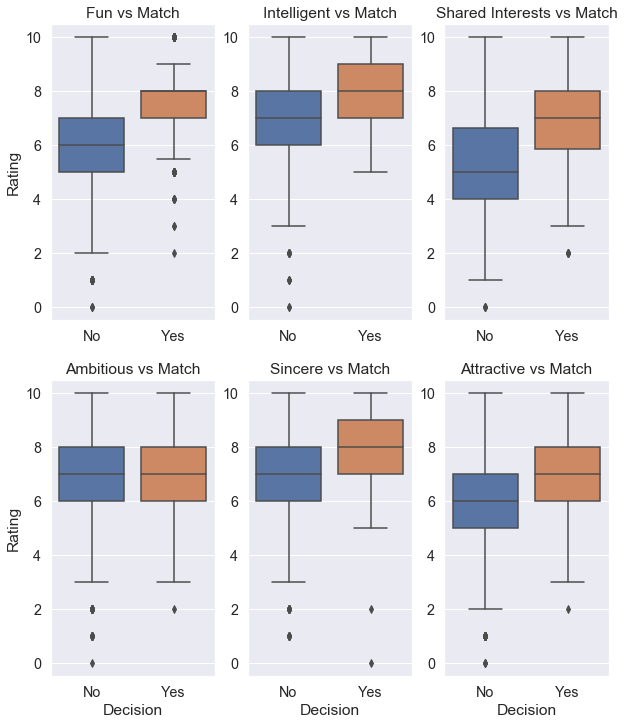

In [68]:
sns.set(font_scale=1.3)
fig,axs=plt.subplots(2,3,figsize=(10,12))
c1=sns.boxplot(y="fun_o",x="match",data=data,ax=axs[0,0])
c1.set_xticklabels(["No","Yes"])
c1.set(ylabel="Rating")
c1.set(xlabel="")
c1.set_title("Fun vs Match")

c2=sns.boxplot(y="intel_o",x="match",data=data,ax=axs[0,1])
c2.set_xticklabels(["No","Yes"])
c2.set(ylabel="")
c2.set(xlabel="")
c2.set_title("Intelligent vs Match")

c3=sns.boxplot(y="amb_o",x="match",data=data,ax=axs[1,0])
c3.set_xticklabels(["No","Yes"])
c3.set(ylabel="Rating")
c3.set(xlabel="Decision")
c3.set_title("Ambitious vs Match")

c4=sns.boxplot(y="sinc_o",x="match",data=data,ax=axs[1,1])
c4.set_xticklabels(["No","Yes"])
c4.set(ylabel="")
c4.set(xlabel="Decision")
c4.set_title("Sincere vs Match")


c5=sns.boxplot(y="attr_o",x="match",data=data,ax=axs[1,2])
c5.set_xticklabels(["No","Yes"])
c5.set(ylabel="")
c5.set(xlabel="Decision")
c5.set_title("Attractive vs Match")

c6=sns.boxplot(y="shar_o",x="match",data=data,ax=axs[0,2])
c6.set_xticklabels(["No","Yes"])
c6.set(ylabel="")
c6.set(xlabel="")
c6.set_title("Shared Interests vs Match")

<a id="section55"></a>
### &nbsp; 6.5. Relation between Met and Match

Text(0.5, 1.0, "Haven't Met vs Match")

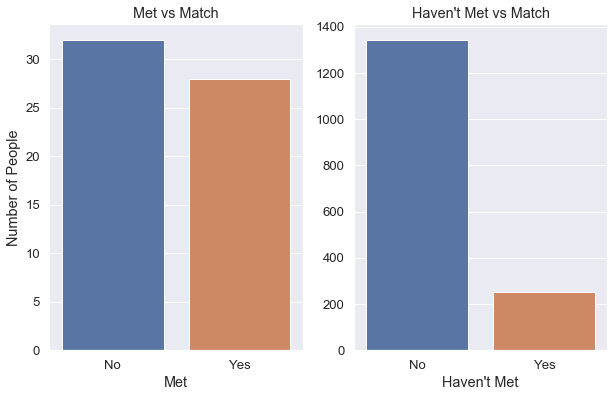

In [69]:
sns.set(font_scale=1.2)
fig,axs=plt.subplots(1,2,figsize=(10,6))
c1=sns.countplot(x="match",data=data[data["act_met"]==1],ax=axs[0])
c1.set_xticklabels(["No","Yes"])
c1.set(ylabel="Number of People")
c1.set(xlabel="Met")
c1.set_title("Met vs Match")



c2=sns.countplot(x="match",data=data[data["act_met"]==0],ax=axs[1])
c2.set_xticklabels(["No","Yes"])
c2.set(xlabel="Haven't Met")
c2.set(ylabel=" ")
c2.set_title("Haven't Met vs Match")




Chances of getting a match increases when subject already has a repo with his/her partner.

<a id="section6"></a>
##  7. Correlation

<a id="section61"></a>
### &nbsp; 7.1. Correlation Table

In [70]:
fcol1=["attr","sinc","fun","match","amb","intel","shar","met","rating","prob","like"]
fcol2=["attr_o","sinc_o","fun_o","match","amb_o","intel_o","shar_o","met_o","rating_o","prob_o","like_o"]

In [71]:
speedDF[fcol1].corr()

,attr,sinc,fun,match,amb,intel,shar,met,rating,prob,like
attr,1.000000,0.404130,0.571670,0.266516,0.297086,0.389922,0.475237,-0.084336,0.717566,0.253118,0.698041
sinc,0.404130,1.000000,0.472314,0.127962,0.417026,0.628515,0.395808,-0.036282,0.723608,0.268552,0.518058
fun,0.571670,0.472314,1.000000,0.258405,0.448083,0.458224,0.631979,-0.102967,0.815384,0.369693,0.677861
match,0.266516,0.127962,0.258405,1.000000,0.131633,0.148770,0.297060,-0.155134,0.282532,0.254009,0.303853
amb,0.297086,0.417026,0.448083,0.131633,1.000000,0.589663,0.450745,-0.049130,0.700915,0.290135,0.435501
intel,0.389922,0.628515,0.458224,0.148770,0.589663,1.000000,0.414941,-0.073377,0.749808,0.232945,0.535002
shar,0.475237,0.395808,0.631979,0.297060,0.450745,0.414941,1.000000,-0.149086,0.769515,0.473320,0.648052
met,-0.084336,-0.036282,-0.102967,-0.155134,-0.049130,-0.073377,-0.149086,1.000000,-0.113665,-0.084800,-0.147839
rating,0.717566,0.723608,0.815384,0.282532,0.700915,0.749808,0.769515,-0.113665,1.000000,0.428265,0.792788
prob,0.253118,0.268552,0.369693,0.254009,0.290135,0.232945,0.473320,-0.084800,0.428265,1.000000,0.461709


In [72]:
speedDF[fcol2].corr()

,attr_o,sinc_o,fun_o,match,amb_o,intel_o,shar_o,met_o,rating_o,prob_o,like_o
attr_o,1.000000,0.404130,0.571670,0.266516,0.297086,0.389922,0.475237,-0.084336,0.717566,0.253118,0.698041
sinc_o,0.404130,1.000000,0.472314,0.127962,0.417026,0.628515,0.395808,-0.036282,0.723608,0.268552,0.518058
fun_o,0.571670,0.472314,1.000000,0.258405,0.448083,0.458224,0.631979,-0.102967,0.815384,0.369693,0.677861
match,0.266516,0.127962,0.258405,1.000000,0.131633,0.148770,0.297060,-0.155134,0.282532,0.254009,0.303853
amb_o,0.297086,0.417026,0.448083,0.131633,1.000000,0.589663,0.450745,-0.049130,0.700915,0.290135,0.435501
intel_o,0.389922,0.628515,0.458224,0.148770,0.589663,1.000000,0.414941,-0.073377,0.749808,0.232945,0.535002
shar_o,0.475237,0.395808,0.631979,0.297060,0.450745,0.414941,1.000000,-0.149086,0.769515,0.473320,0.648052
met_o,-0.084336,-0.036282,-0.102967,-0.155134,-0.049130,-0.073377,-0.149086,1.000000,-0.113665,-0.084800,-0.147839
rating_o,0.717566,0.723608,0.815384,0.282532,0.700915,0.749808,0.769515,-0.113665,1.000000,0.428265,0.792788
prob_o,0.253118,0.268552,0.369693,0.254009,0.290135,0.232945,0.473320,-0.084800,0.428265,1.000000,0.461709


<a id="section62"></a>
### &nbsp; 7.2. Plotting a Heatmap to visualize correlation


(11.0, 1.0)

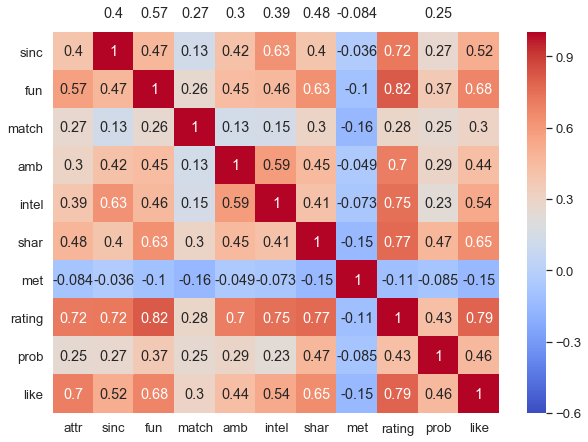

In [73]:
fig,ax=plt.subplots(figsize=(10,7))
heat=sns.heatmap(speedDF[fcol1].corr(),vmax=1,vmin=-0.6,annot=True,ax=ax,cmap="coolwarm")
plt.yticks(rotation=0)
bottom,top=heat.get_ylim()
heat.set_ylim(bottom+0.5,top+0.5)

(11.0, 1.0)

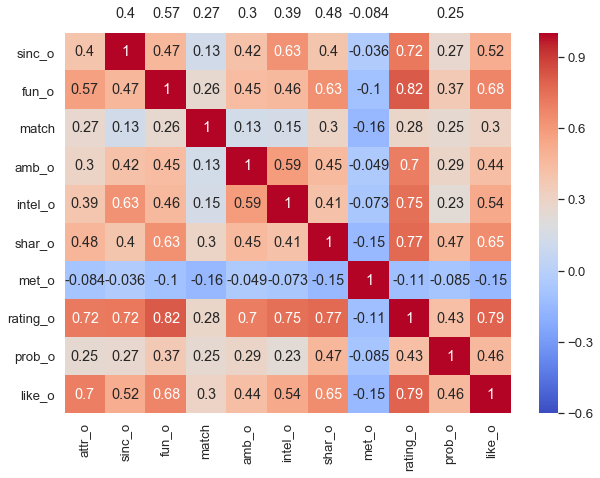

In [74]:
fig,ax=plt.subplots(figsize=(10,7))
heat=sns.heatmap(speedDF[fcol2].corr(),vmax=1,vmin=-0.6,annot=True,ax=ax,cmap="coolwarm")
plt.yticks(rotation=0)
bottom,top=heat.get_ylim()
heat.set_ylim(bottom+0.5,top+0.5)

<a id="section7"></a>

## 8. Model Development using Pipeline


<a id="section71"></a>
###  &nbsp; 8.1. Feature Selection





After referring the above heatmaps, following features are to be selected for the model.
* attr,
* fun
* sinc
* intel
* amb
* shar
* act_met
* met
* met_o
* prob
* rating
* rating_o
* attr_o
* fun_o
* sinc_o
* intel_o
* shar_o
* prob_o
* amb_o

In [75]:
features=["attr","fun","sinc","amb","intel","act_met","met","prob","met_o","shar","rating","rating_o","sinc_o","amb_o","intel_o","attr_o","fun_o","shar_o","prob_o"]


In [76]:
X=speedDF[features][(speedDF["wave"]==1)| (speedDF["wave"]==2)|(speedDF["wave"]==3)]
y=speedDF["match"][(speedDF["wave"]==1)| (speedDF["wave"]==2)|(speedDF["wave"]==3)]

<a id="section72"></a>
###  &nbsp; 8.2. Train, test split


In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.33)

<a id="section73"></a>
### &nbsp; 8.3. RandomForest Algorithm

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
RF_pipeline = make_pipeline(StandardScaler(),PCA(n_components=6),RandomForestClassifier(random_state=0))

RF_pipeline.fit(X_train, y_train)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=6,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                     

In [79]:
RF_predictions= RF_pipeline.predict(X_test)

In [80]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, RF_predictions)

0.8798798798798799

<a id="section8"></a>
## 9. Model Evaluation

In [81]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

<a id="section81"></a>
###  &nbsp; 9.1. Confusion Matrix


In [82]:
import numpy as np
cm = pd.DataFrame(confusion_matrix(y_test, RF_predictions))
cm['Total'] = np.sum(cm, axis=1)
cm = cm.append(np.sum(cm, axis=0), ignore_index=True)
cm.columns = ['Predicted No', 'Predicted Yes', 'Total']
cm = cm.set_index([['Actual No', 'Actual Yes', 'Total']])
print(cm)

            Predicted No  Predicted Yes  Total
Actual No            279              7    286
Actual Yes            33             14     47
Total                312             21    333


* The Model excels in minimising false positives, this means that subject would hardly be matched with someone who he/she shouldn't be with. 
* The Model doesn't excel in reducing false negatives, this means that amount of matches a subject gets would be lower than before. 

<a id="section82"></a>
###  &nbsp; 9.2. Classification Report


In [83]:
print(classification_report(y_test, RF_predictions))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       286
           1       0.67      0.30      0.41        47

    accuracy                           0.88       333
   macro avg       0.78      0.64      0.67       333
weighted avg       0.86      0.88      0.86       333



<a id="section83"></a>
###  &nbsp; 9.3. ROC-curve


In [84]:
logit_roc_auc = roc_auc_score(y_test, RF_predictions) 

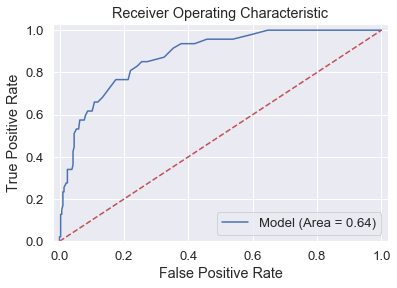

In [85]:
fpr, tpr, thresholds = roc_curve(y_test, RF_pipeline.predict_proba(X_test)[:,1]) 
plt.figure()
plt.plot(fpr, tpr, label='Model (Area = %0.2f)' % logit_roc_auc) 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.02])
plt.ylim([0.0, 1.03])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

<a id="section9"></a>
## 10. Result


In [86]:
X_res=speedDF[features][(speedDF["wave"]==4)]
y_res=speedDF["match"][(speedDF["wave"]==4)]

In [87]:
RF_predictions2= RF_pipeline.predict(X_res)

In [88]:
print("Model Accuracy:",accuracy_score(y_res, RF_predictions2)*100)

Model Accuracy: 82.56172839506173
